## Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style 
style.use('ggplot')
from textblob import TextBlob 
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## dataFrame

In [3]:
df=pd.read_csv('tweet.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  800 non-null    int64 
 1   User        800 non-null    object
 2   Tweet       800 non-null    object
 3   Time        800 non-null    object
dtypes: int64(1), object(3)
memory usage: 25.1+ KB


## Data cleaning

### Dropping the dupicates

In [4]:
df=df.drop_duplicates()
df

,Unnamed: 0,User,Tweet,Time
0,0,Unsatisfedsoul,@zomato @Swiggy let's see who feeds me today f...,2023-05-14 07:25:35+00:00
1,1,JAI86COOL,@zomatocare @zomato Am I getting my refund for...,2023-05-14 07:24:38+00:00
2,2,rupalkpr124,@Rajatkapoor90 @zomato @zomatocare Zomato is a...,2023-05-14 07:22:11+00:00
3,3,Notsomusingeve,Ordering from @zomato has become a test in pat...,2023-05-14 07:20:39+00:00
4,4,AvinashSalim,RT @SalimAvina85056: @zomato \nAgreement signa...,2023-05-14 07:20:33+00:00
...,...,...,...,...
795,795,souravd17887345,RT @souravd17887345: @zomato @zomatocare @zom...,2023-05-13 08:47:32+00:00
796,796,souravd17887345,RT @souravd17887345: @zomato doesn't have an o...,2023-05-13 08:47:29+00:00
797,797,sumanna00027563,Got my order now after the time .. what’s now ...,2023-05-13 08:47:10+00:00
798,798,souravd17887345,@zomato doesn't have an option to contact thei...,2023-05-13 08:44:20+00:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  800 non-null    int64 
 1   User        800 non-null    object
 2   Tweet       800 non-null    object
 3   Time        800 non-null    object
dtypes: int64(1), object(3)
memory usage: 31.2+ KB


In [6]:
df.isnull().sum()

Unnamed: 0    0
User          0
Tweet         0
Time          0
dtype: int64

In [7]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    800 non-null    object
 1   Tweet   800 non-null    object
 2   Time    800 non-null    object
dtypes: object(3)
memory usage: 25.0+ KB


### cleaned dataset

In [8]:
df

,User,Tweet,Time
0,Unsatisfedsoul,@zomato @Swiggy let's see who feeds me today f...,2023-05-14 07:25:35+00:00
1,JAI86COOL,@zomatocare @zomato Am I getting my refund for...,2023-05-14 07:24:38+00:00
2,rupalkpr124,@Rajatkapoor90 @zomato @zomatocare Zomato is a...,2023-05-14 07:22:11+00:00
3,Notsomusingeve,Ordering from @zomato has become a test in pat...,2023-05-14 07:20:39+00:00
4,AvinashSalim,RT @SalimAvina85056: @zomato \nAgreement signa...,2023-05-14 07:20:33+00:00
...,...,...,...
795,souravd17887345,RT @souravd17887345: @zomato @zomatocare @zom...,2023-05-13 08:47:32+00:00
796,souravd17887345,RT @souravd17887345: @zomato doesn't have an o...,2023-05-13 08:47:29+00:00
797,sumanna00027563,Got my order now after the time .. what’s now ...,2023-05-13 08:47:10+00:00
798,souravd17887345,@zomato doesn't have an option to contact thei...,2023-05-13 08:44:20+00:00


In [9]:
df.to_csv('Twitter_project.csv')

In [10]:
df=pd.read_csv('Twitter_project.csv',index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    800 non-null    object
 1   Tweet   800 non-null    object
 2   Time    800 non-null    object
dtypes: object(3)
memory usage: 25.0+ KB


## Data Preprocessing

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [12]:
lemmatizer = WordNetLemmatizer()
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

In [13]:
words=[]
wordsi=[]
def data_processing(raw_text,flag):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens = sentence.split()
    
    # remove stop words                
    clean_tokens = [t for t in tokens if not t in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(word) for word in clean_tokens]
        words.append(" ".join(clean_tokens))
        wordsi.extend(clean_tokens)
    else:
        clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
        words.append(" ".join(clean_tokens))
        wordsi.extend(clean_tokens)
    
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])


In [14]:
df['Tweet'] = np.vectorize(remove_pattern)(df['Tweet'], "@[\w]*")
df2=df['Tweet'].apply(lambda x:data_processing(x,'lem')) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 0 to 799
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   User    800 non-null    object
 1   Tweet   800 non-null    object
 2   Time    800 non-null    object
dtypes: object(3)
memory usage: 25.0+ KB


In [15]:
df2

,0,1
0,let see feed today free,5
1,getting refund order insane never expected zom...,13
2,care zomato always like worst service,6
3,ordering become test patience anger management...,14
4,rt agreement signature additional labour commi...,15
...,...,...
795,rt care scamming people resolving customer iss...,11
796,rt option contact customer service required ch...,9
797,got order time care http co pybj http co bqhi hjw,11
798,option contact customer service required chat ...,12


In [16]:
df2.columns = ['clean_Tweet_lemma', 'Tweet_length_lemma']

df2.head()

,clean_Tweet_lemma,Tweet_length_lemma
0,let see feed today free,5
1,getting refund order insane never expected zom...,13
2,care zomato always like worst service,6
3,ordering become test patience anger management...,14
4,rt agreement signature additional labour commi...,15


In [17]:
df= pd.concat([df, df2], axis=1)

df.head()

,User,Tweet,Time,clean_Tweet_lemma,Tweet_length_lemma
0,Unsatisfedsoul,let's see who feeds me today for free👀,2023-05-14 07:25:35+00:00,let see feed today free,5
1,JAI86COOL,Am I getting my refund for order No 47732671...,2023-05-14 07:24:38+00:00,getting refund order insane never expected zom...,13
2,rupalkpr124,care Zomato is always like this. Worst service.,2023-05-14 07:22:11+00:00,care zomato always like worst service,6
3,Notsomusingeve,Ordering from has become a test in patience a...,2023-05-14 07:20:39+00:00,ordering become test patience anger management...,14
4,AvinashSalim,RT : \nAgreement signature by Additional labo...,2023-05-14 07:20:33+00:00,rt agreement signature additional labour commi...,15


In [18]:
df.to_csv('df_tweetproject.csv')

## Polarity check

In [19]:
def polarity(text):
    return TextBlob(text).sentiment.polarity
df['polarity'] = df['clean_Tweet_lemma'].apply(polarity)

In [20]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"
df['sentiment'] = df['polarity'].apply(sentiment)

In [21]:
df

,User,Tweet,Time,clean_Tweet_lemma,Tweet_length_lemma,polarity,sentiment
0,Unsatisfedsoul,let's see who feeds me today for free👀,2023-05-14 07:25:35+00:00,let see feed today free,5,0.400000,Positive
1,JAI86COOL,Am I getting my refund for order No 47732671...,2023-05-14 07:24:38+00:00,getting refund order insane never expected zom...,13,-0.203409,Negative
2,rupalkpr124,care Zomato is always like this. Worst service.,2023-05-14 07:22:11+00:00,care zomato always like worst service,6,-1.000000,Negative
3,Notsomusingeve,Ordering from has become a test in patience a...,2023-05-14 07:20:39+00:00,ordering become test patience anger management...,14,0.166667,Positive
4,AvinashSalim,RT : \nAgreement signature by Additional labo...,2023-05-14 07:20:33+00:00,rt agreement signature additional labour commi...,15,0.000000,Neutral
...,...,...,...,...,...,...,...
795,souravd17887345,RT : care is scamming people by not resolvi...,2023-05-13 08:47:32+00:00,rt care scamming people resolving customer iss...,11,-0.500000,Negative
796,souravd17887345,RT : doesn't have an option to contact their ...,2023-05-13 08:47:29+00:00,rt option contact customer service required ch...,9,-1.000000,Negative
797,sumanna00027563,Got my order now after the time .. what’s now ...,2023-05-13 08:47:10+00:00,got order time care http co pybj http co bqhi hjw,11,0.000000,Neutral
798,souravd17887345,doesn't have an option to contact their custo...,2023-05-13 08:44:20+00:00,option contact customer service required chat ...,12,-1.000000,Negative


<AxesSubplot:xlabel='sentiment', ylabel='count'>

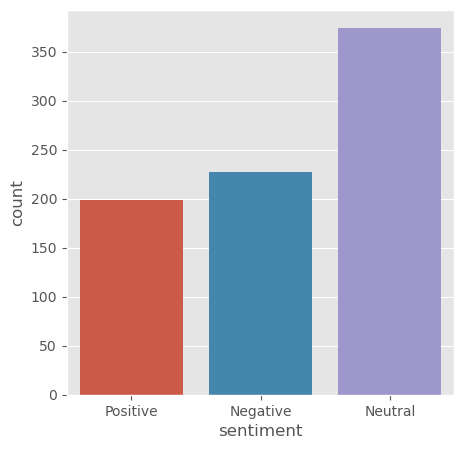

In [22]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = df)

## PieChart of Sentiments

Text(0.5, 1.0, 'Distribution of sentiments')

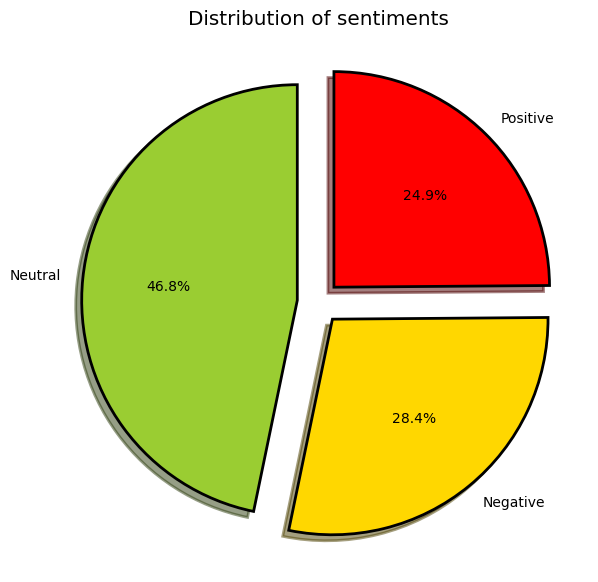

In [23]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

## Splitting the data into training and testing

In [28]:
vect = CountVectorizer(ngram_range=(1,2)).fit(df['clean_Tweet_lemma'])
X = df['clean_Tweet_lemma']
Y = df['sentiment']
X = vect.transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))
import warnings
warnings.filterwarnings('ignore')

Size of x_train: (640, 10009)
Size of y_train: (640,)
Size of x_test: (160, 10009)
Size of y_test: (160,)


# CLASSIFICATION MODELS

### LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_test_pred = classifier.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred))

print(classification_report(y_test, y_test_pred))

0.7125
              precision    recall  f1-score   support

    Negative       0.72      0.59      0.65        49
     Neutral       0.71      0.91      0.80        76
    Positive       0.70      0.46      0.55        35

    accuracy                           0.71       160
   macro avg       0.71      0.65      0.67       160
weighted avg       0.71      0.71      0.70       160



### DECISION TREE

In [33]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_test_pred_dt = classifier_dt.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred_dt))

print(classification_report(y_test, y_test_pred_dt))

0.7375
              precision    recall  f1-score   support

    Negative       0.80      0.65      0.72        49
     Neutral       0.73      0.91      0.81        76
    Positive       0.65      0.49      0.56        35

    accuracy                           0.74       160
   macro avg       0.73      0.68      0.70       160
weighted avg       0.74      0.74      0.73       160



###  SVC

In [36]:
%%time
from sklearn import svm
classifier_svc = svm.LinearSVC()
classifier_svc.fit(x_train, y_train)

Wall time: 669 ms


LinearSVC()

In [37]:
y_test_pred_svc = classifier_svc.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_test, y_test_pred_svc))

print(classification_report(y_test, y_test_pred_svc))

0.70625
              precision    recall  f1-score   support

    Negative       0.70      0.57      0.63        49
     Neutral       0.71      0.88      0.78        76
    Positive       0.72      0.51      0.60        35

    accuracy                           0.71       160
   macro avg       0.71      0.66      0.67       160
weighted avg       0.71      0.71      0.70       160



### Confusion Matrix

In [39]:
print(confusion_matrix(y_test, y_test_pred))
print("\n")
print(classification_report(y_test, y_test_pred))

[[29 17  3]
 [ 3 69  4]
 [ 8 11 16]]


              precision    recall  f1-score   support

    Negative       0.72      0.59      0.65        49
     Neutral       0.71      0.91      0.80        76
    Positive       0.70      0.46      0.55        35

    accuracy                           0.71       160
   macro avg       0.71      0.65      0.67       160
weighted avg       0.71      0.71      0.70       160



# CLUSTERING

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [41]:
# Vectorize the words using TF-IDF
vectorizer = TfidfVectorizer()
X_words = vectorizer.fit_transform(words)

In [42]:
# Vectorize the sentences using TF-IDF
X_sentences = vectorizer.transform(words)

# Perform clustering using K-means on sentences
k = 2  # Number of sentence clusters
kmeans_sentences = KMeans(n_clusters=k)
kmeans_sentences.fit(X_sentences)

KMeans(n_clusters=2)

In [51]:
# Perform dimensionality reduction using TruncatedSVD on sentences
svd = TruncatedSVD(n_components=2)
reduced_vectors = svd.fit_transform(X_sentences)

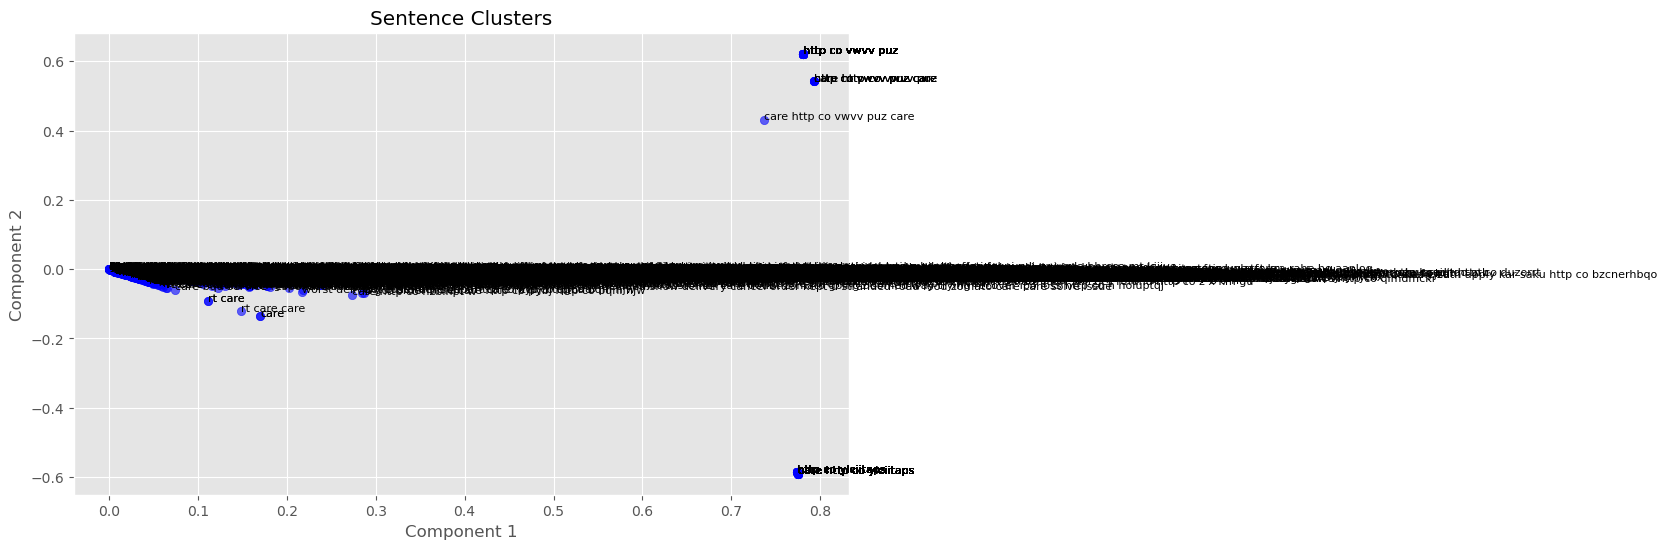

In [54]:
# Plot the sentence clusters
plt.figure(figsize=(10, 6))
for i, sentence in enumerate(words):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], c='b', alpha=0.6)
    plt.annotate(sentence,(reduced_vectors[i, 0], reduced_vectors[i, 1]) , fontsize=8)
# (reduced_vectors[i, 0], reduced_vectors[i, 1])
plt.title('Sentence Clusters')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

In [45]:
vectorizer = TfidfVectorizer()
X_words = vectorizer.fit_transform(wordsi)

# Perform clustering using K-means on words
k = 3  # Number of word clusters
kmeans_words = KMeans(n_clusters=k)
kmeans_words.fit(X_words)

KMeans(n_clusters=3)

In [46]:
# Print the word clusters
for i in range(k):
    cluster_words = [word for word, label in zip(wordsi, kmeans_words.labels_) if label == i]
    print(f"Word Cluster {i+1}:")
    print(cluster_words)
    print()

Word Cluster 1:
['let', 'see', 'feed', 'today', 'free', 'getting', 'refund', 'insane', 'never', 'expected', 'zomato', 'big', 'thug', 'zomato', 'new', 'thug', 'town', 'zomato', 'always', 'like', 'worst', 'service', 'ordering', 'become', 'test', 'patience', 'anger', 'management', 'deleting', 'app', 'look', 'like', 'good', 'healthy', 'development', 'inshaallah', 'rt', 'agreement', 'signature', 'additional', 'labour', 'commissioner', 'sreelal', 'zomato', 'state', 'head', 'hiran', 'zomato', 'city', 'ceo', 'abi', 'reality', 'ontime', 'delivery', 'guarantee', 'fake', 'customer', 'satisfaction', 'delayed', 'receive', 'zomato', 'credit', 'item', 'missing', 'earlier', 'gold', 'member', 'pfa', 'reference', 'showing', 'free', 'delivery', 'however', 'ordering', 'show', 'delivery', 'http', 'co', 'lyrvzihwg', 'thanks', 'letting', 'know', 'value', 'http', 'co', 'zz', 'xrtjsuz', 'worst', 'customer', 'service', 'started', 'wrong', 'provided', 'restaurant', 'still', 'action', 'taken', 'kindly', 'reply', 

## Frequent Words

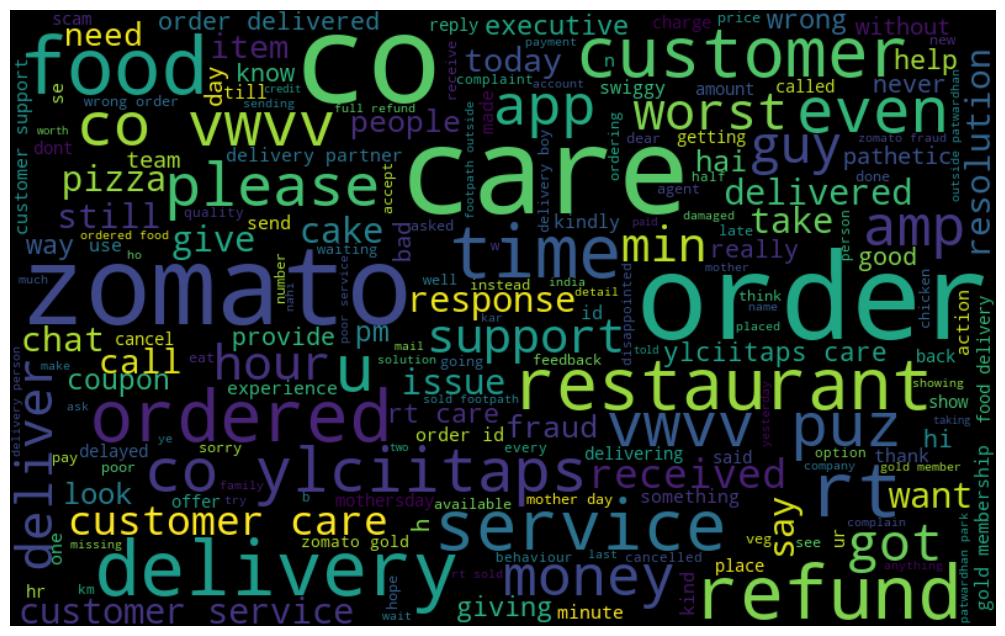

In [47]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_Tweet_lemma']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

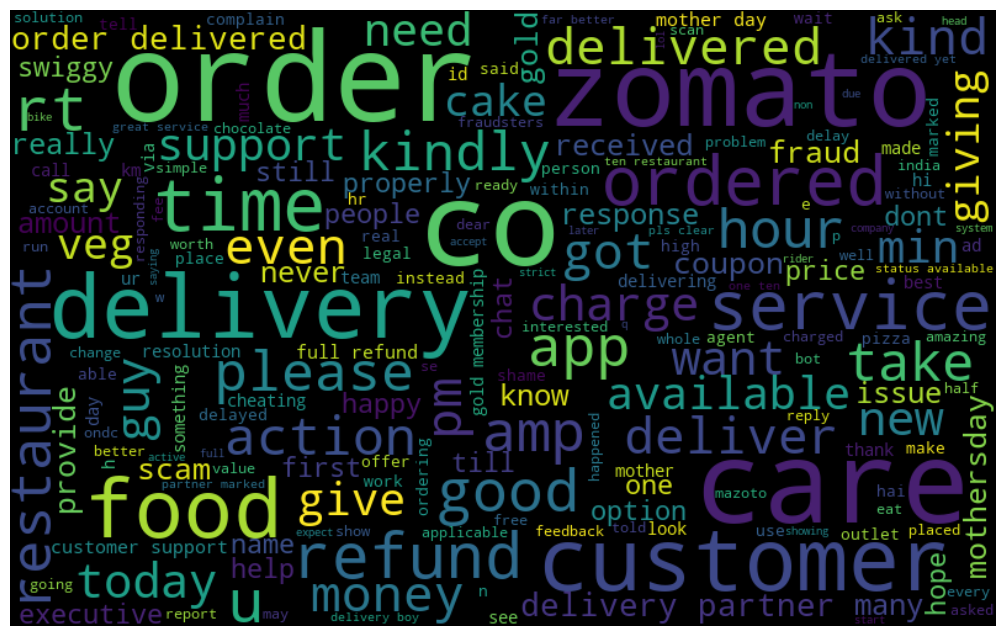

In [48]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_Tweet_lemma'][df['sentiment']=='Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

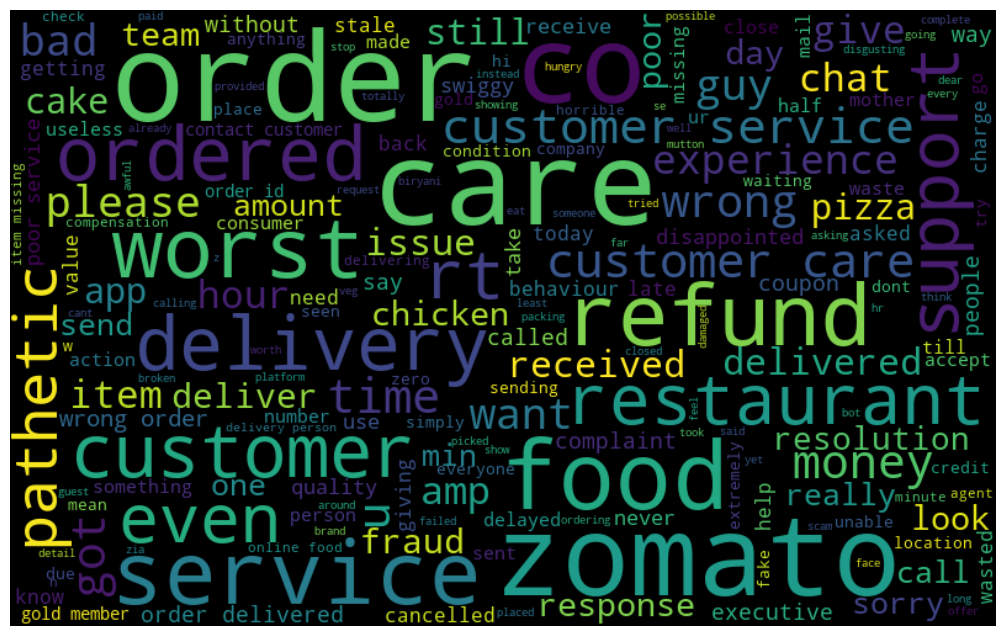

In [49]:
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_Tweet_lemma'][df['sentiment']=='Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

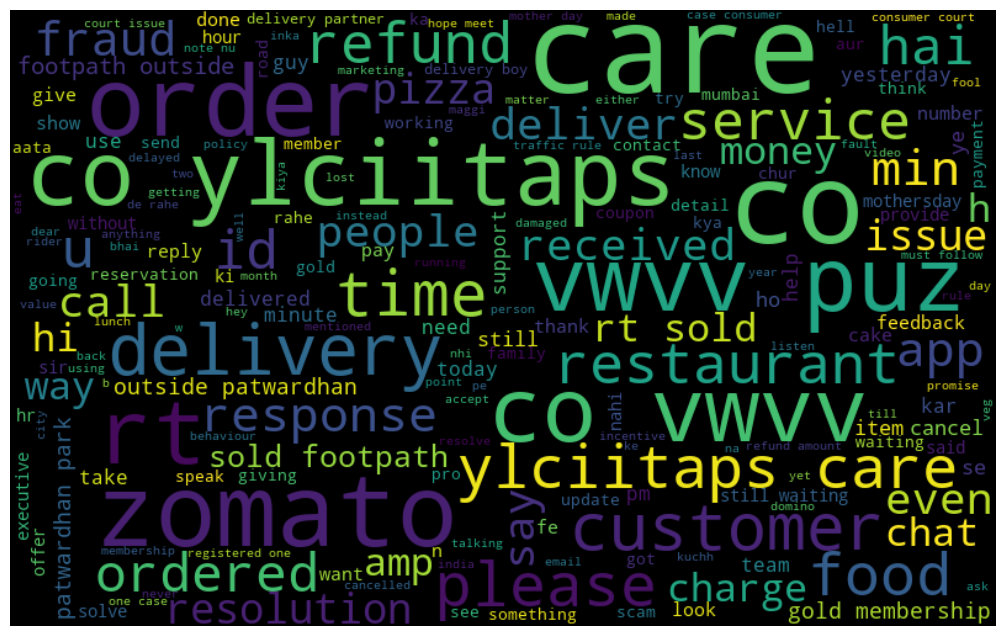

In [50]:
# frequent words visualization for neutral
all_words = " ".join([sentence for sentence in df['clean_Tweet_lemma'][df['sentiment']=='Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()